In [4]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.special as g

In [5]:
#математическое ожидание и дисперсия Распределение Вейбулла, с - параметр отказов
c=2
mean_gen,var_gen=sts.weibull_max(2).stats(moments='mv')
#проверка статистик из формул https://en.wikipedia.org/wiki/Weibull_distribution, 
#лямда как я понял для встроенной в scipy функции = -1
# по этому в матожидании стоит минус (так как эта встроенная функция weibull_max частный случай 
#распределения Вейбулла, есть еще weibull_min

print(-g.gamma(1+1/c),(g.gamma(1+2/c)-g.gamma(1+1/c)**2))
print(mean_gen,var_gen)

-0.8862269254527579 0.21460183660255183
-0.8862269254527579 0.21460183660255183


C:\p\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


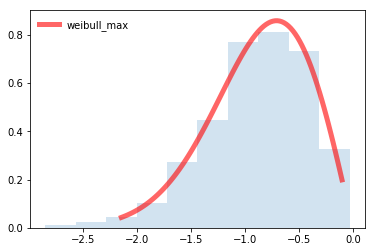

In [6]:
#задаем значения х в диапазоне от 1% распредиления до 99% с шагом 100
x = np.linspace(sts.weibull_max(c).ppf(0.01),  sts.weibull_max(c).ppf(0.99), 100)
#график плотности распределения вероятности
plt.plot(x, sts.weibull_max(c).pdf(x),'r-', lw=5, alpha=0.6, label='weibull_max')

#генерируем 1000 значений функции распределения Рэлея и строим гистограмму
r = sts.weibull_max(c).rvs(size=1000)

plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

In [7]:
#задаю объемы выборки
n_sample=np.array([3,5,10,50,100,200])
#пустая матрица из 0 для записи средних по каждой выборке
sampl_matr=np.zeros((6,1000))

#расчет выборочных средних по каждой выборке и запись в матрицу
for n in n_sample:
    for i in np.arange(6):
        for j in np.arange(1000):
            sampl_matr[i][j]=sum(sts.weibull_max(c).rvs(size=n))/n

C:\p\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'p(x)')

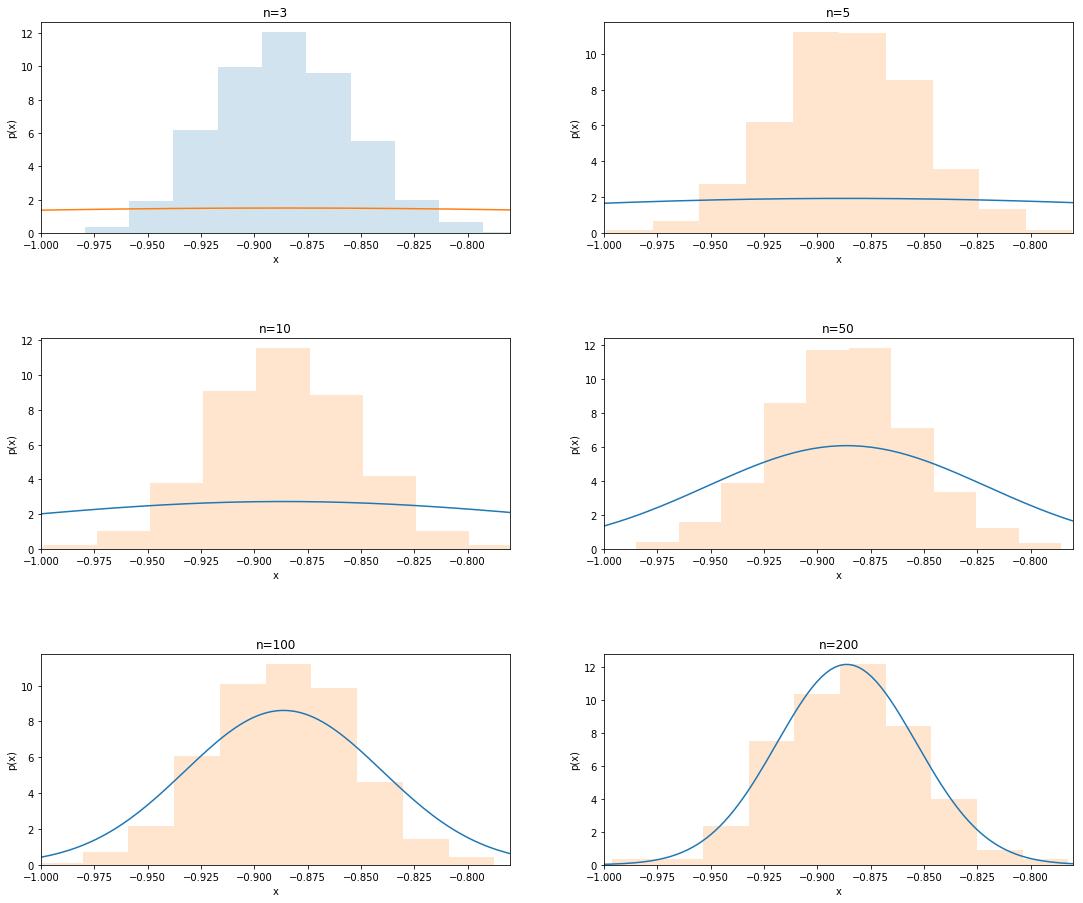

In [9]:
#Создаем 6 гистограмм
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2)
fig.subplots_adjust(hspace = 0.5)
fig.set_size_inches(18.5, 15.5)

#задаем значения х для нормального распределения
r=np.linspace(sts.norm(loc=mean_gen,scale=var_gen**0.5).ppf(0.01),  sts.norm(loc=mean_gen,scale=var_gen**0.5).ppf(0.99), 1000)
#считаем СКО (scale имеет смысл именно СКО в stats.norm, СКО это корень из дисперсии), 
#для нормального распределения и рисуем график и строим гистгорамму
D1=(var_gen/n_sample[0])**0.5
bins=ax1.hist(sampl_matr[0][:],normed=True, histtype='stepfilled', alpha=0.2)
ax1.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D1))
ax1.set_title('n=3')
ax1.set_xlim(-1, -0.78)
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')

D2=(var_gen/n_sample[1])**0.5
ax2.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D2))
ax2.hist(sampl_matr[1][:], normed=True, histtype='stepfilled', alpha=0.2)
ax2.set_title('n=5')
ax2.set_xlim(-1, -0.78)
ax2.set_xlabel('x')
ax2.set_ylabel('p(x)')

D3=(var_gen/n_sample[2])**0.5
ax3.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D3))
ax3.hist(sampl_matr[2][:], normed=True, histtype='stepfilled', alpha=0.2)
ax3.set_title('n=10')
ax3.set_xlim(-1, -0.78)
ax3.set_xlabel('x')
ax3.set_ylabel('p(x)')

D4=(var_gen/n_sample[3])**0.5
ax4.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D4))
ax4.hist(sampl_matr[3][:], normed=True, histtype='stepfilled', alpha=0.2)
ax4.set_title('n=50')
ax4.set_xlim(-1, -0.78)
ax4.set_xlabel('x')
ax4.set_ylabel('p(x)')

D5=(var_gen/n_sample[4])**0.5
ax5.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D5))
ax5.hist(sampl_matr[4][:], normed=True, histtype='stepfilled', alpha=0.2)
ax5.set_title('n=100')
ax5.set_xlim(-1, -0.78)
ax5.set_xlabel('x')
ax5.set_ylabel('p(x)')

D6=(var_gen/n_sample[5])**0.5
ax6.plot(r,sts.norm.pdf(r,loc=mean_gen,scale=D6))
ax6.hist(sampl_matr[5][:], normed=True, histtype='stepfilled', alpha=0.2)
ax6.set_title('n=200')
ax6.set_xlim(-1, -0.78)
ax6.set_xlabel('x')
ax6.set_ylabel('p(x)')

# Выводы

Сначала найдены парметры математического ожидания и дисперсии для распределения Вейбула. Затем построена гистограмма выборки из 1000 значений и нарисован поверх неё теоретическая плотность распределения случайной величины. Следующим шагом было генерация по 1000 выборок объемами 3, 5, 10, 50, 100, 200 и найдены выборочные средние по каждой из них и построены гистограммы распредедения частот выборочных средних. Последним этапом было аппроксимация гистограмм нормальным законом распределения с параметрами матожидания искодной величины, то есть =-0.886 и дисперсии = 0.2146 деленной на объем выборки n. Как видно из графиков, чем больше объем выборки, тем более точным становится аппроксимация гистограммы, что доказывает центральную предельную теорему.
